Image Data -> Data Processing -> Train Test Split -> CNN Training -> Model Evaluation

In [3]:
import random
import numpy as np
import tensorflow as tf

# for reproducibiity
random.seed(47)
np.random.seed(47)
tf.random.set_seed(47)

In [53]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [9]:
os.listdir('/kaggle/input/')

['plantvillage-dataset']

In [17]:
base_dir = "/kaggle/input/plantvillage-dataset"

In [19]:
# THE FOLDER IN the unzip file
print(os.listdir("/kaggle/input/plantvillage-dataset"))


print(len(os.listdir(f"{base_dir}/segmented")))
print(os.listdir(f"{base_dir}/segmented")[:5])

# will be using color
print(len(os.listdir(f"{base_dir}/color")))
print(os.listdir(f"{base_dir}/color")[:5])

print(len(os.listdir(f"{base_dir}/grayscale")))
print(os.listdir(f"{base_dir}/grayscale")[:5])
     

['segmented', 'grayscale', 'plantvillage dataset', 'color']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy']


In [20]:
print(len(os.listdir(f"{base_dir}/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus")))
print(os.listdir(f"{base_dir}/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus")[:5])

5357
['d08a1c48-3360-40e3-9c3d-e47c2812bed2___UF.GRC_YLCV_Lab 01920.JPG', 'c38d09ad-afb9-4f8e-86cd-990dec5d6dbb___YLCV_GCREC 2734.JPG', 'cf44dfe4-9bd3-42fc-bb40-a3736043186c___UF.GRC_YLCV_Lab 02373.JPG', 'e4d799e6-c090-4837-bae9-ef28b6b86155___UF.GRC_YLCV_Lab 02603.JPG', 'cfdbbfba-3cdc-4aa2-9c43-cddeff7f6d73___YLCV_NREC 0309.JPG']


# Data Preprocessing

In [24]:
# examinne one of the images

image_path =f"{base_dir}/color/Tomato___Tomato_Yellow_Leaf_Curl_Virus/cfdbbfba-3cdc-4aa2-9c43-cddeff7f6d73___YLCV_NREC 0309.JPG"

# read image
img = mpimg.imread(image_path)
print(img.shape) # so its 256 x 256



(256, 256, 3)


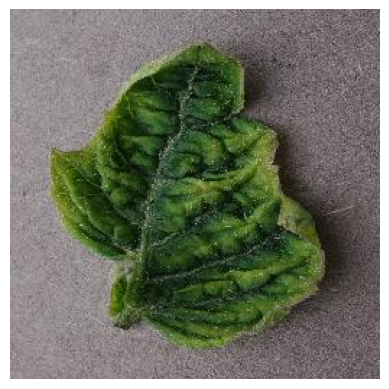

In [25]:
#Display image
plt.imshow(img)
plt.axis("off") #turn off the axis
plt.show()

In [26]:
# image Parameters
img_size = 224 # common standard
batch_size =32

In [27]:
print(img) # not standardized yet 0 black white 255

[[[145 139 143]
  [147 141 145]
  [153 147 151]
  ...
  [122 111 115]
  [111 100 104]
  [112 101 105]]

 [[148 142 146]
  [151 145 149]
  [157 151 155]
  ...
  [133 122 126]
  [ 99  88  92]
  [ 96  85  89]]

 [[148 142 146]
  [153 147 151]
  [158 152 156]
  ...
  [115 104 108]
  [ 82  71  75]
  [127 116 120]]

 ...

 [[150 139 143]
  [150 139 143]
  [148 137 141]
  ...
  [102  92  93]
  [ 89  79  80]
  [115 105 106]]

 [[164 153 157]
  [149 138 142]
  [142 131 135]
  ...
  [121 111 112]
  [107  97  98]
  [128 118 119]]

 [[148 137 141]
  [144 133 137]
  [149 138 142]
  ...
  [107  97  98]
  [105  95  96]
  [106  96  97]]]


# Train test split

In [28]:
# Image data generators

data_gen = ImageDataGenerator(
    rescale = 1./255, # normalizing values
    validation_split = 0.2 # 20% is vlaidations
)

In [30]:
base_dir = "/kaggle/input/plantvillage-dataset/color"

In [31]:
# train generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "training",
    class_mode ="categorical"
)

Found 43456 images belonging to 38 classes.


In [39]:
# get attributes name
dir(train_generator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_set_index_array',
 '_warn_if_super_not_called',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'max_queue_size',
 'n',
 'num_batches',
 'num_classes',
 'on_epoch_be

In [70]:
# model def
model = models.Sequential()

# first layer
# 32 filters of dim 3x3, input shape (H,W,C)
model.add(layers.Conv2D(32, (3, 3), input_shape=(img_size, img_size, 3)))
 
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))

# 2nd  layer
# increase the filters
model.add(layers.Conv2D(64, (3, 3)))
 
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, 2))

#FC layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [32]:
# validation generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = "validation",
    class_mode ="categorical"
)

Found 10849 images belonging to 38 classes.


In [71]:
# model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:

# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 82ms/step - accuracy: 0.4639 - loss: 2.1304 - val_accuracy: 0.8280 - val_loss: 0.5955
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 85ms/step - accuracy: 0.7716 - loss: 0.7492 - val_accuracy: 0.8660 - val_loss: 0.4210
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 112s 82ms/step - accuracy: 0.8403 - loss: 0.5009 - val_accuracy: 0.8849 - val_loss: 0.3734
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 111s 82ms/step - accuracy: 0.8785 - loss: 0.3761 - val_accuracy: 0.8788 - val_loss: 0.3833
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 80ms/step - accuracy: 0.9013 - loss: 0.3010 - val_accuracy: 0.8842 - val_loss: 0.3954


In [75]:
# Model Evaluation
print("Evaluating model")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     

Evaluating model
339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8821 - loss: 0.3966
Validation Accuracy: 88.41%


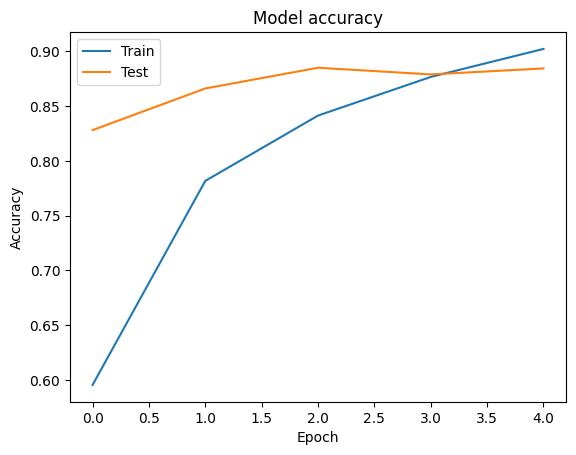

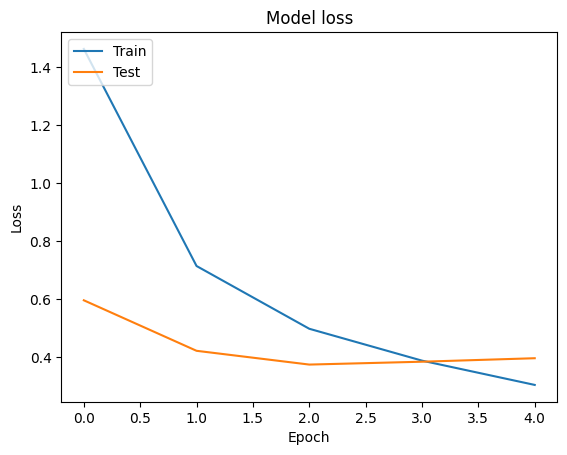

In [76]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [77]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name
     

In [78]:
train_generator.class_indices.items()

dict_items([('Apple___Apple_scab', 0), ('Apple___Black_rot', 1), ('Apple___Cedar_apple_rust', 2), ('Apple___healthy', 3), ('Blueberry___healthy', 4), ('Cherry_(including_sour)___Powdery_mildew', 5), ('Cherry_(including_sour)___healthy', 6), ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7), ('Corn_(maize)___Common_rust_', 8), ('Corn_(maize)___Northern_Leaf_Blight', 9), ('Corn_(maize)___healthy', 10), ('Grape___Black_rot', 11), ('Grape___Esca_(Black_Measles)', 12), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 13), ('Grape___healthy', 14), ('Orange___Haunglongbing_(Citrus_greening)', 15), ('Peach___Bacterial_spot', 16), ('Peach___healthy', 17), ('Pepper,_bell___Bacterial_spot', 18), ('Pepper,_bell___healthy', 19), ('Potato___Early_blight', 20), ('Potato___Late_blight', 21), ('Potato___healthy', 22), ('Raspberry___healthy', 23), ('Soybean___healthy', 24), ('Squash___Powdery_mildew', 25), ('Strawberry___Leaf_scorch', 26), ('Strawberry___healthy', 27), ('Tomato___Bacterial_spot', 

In [46]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}
     
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:

model.save('plant_disease_prediction_model.h5')

In [82]:
model.save('C:\Users\marya\OneDrive\Desktop\plant_disease_prediction_model.h5')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3530918973.py, line 1)